In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [2]:
#
humidity = ctrl.Antecedent(np.arange(0, 31, 0.1), 'humidity')
temperature = ctrl.Antecedent(np.arange(0, 46, 0.1), 'temperature')
duration = ctrl.Consequent(np.arange(0, 71, 0.1), 'duration')

In [3]:
# # 
# humidity.automf(3)
# temperature.automf(3)

# #
# duration['low'] = fuzz.trimf(duration.universe, [0, 0, 35])
# duration['medium'] = fuzz.trimf(duration.universe, [0, 35, 70])
# duration['high'] = fuzz.trimf(duration.universe, [35, 70, 70])

In [4]:
humidity['dry'] = fuzz.trapmf(humidity.universe, [0, 0, 5, 12.5])
humidity['humid'] = fuzz.trimf(humidity.universe, [5, 12.5, 22.5])
humidity['wet'] = fuzz.trapmf(humidity.universe, [17.5, 20, 30, 30])

temperature['cold'] = fuzz.trapmf(temperature.universe, [0, 0, 5, 10])
temperature['fresh'] = fuzz.trimf(temperature.universe, [5, 12.5, 22.5])
temperature['normal'] = fuzz.trimf(temperature.universe, [15, 22.5, 27.5])
temperature['hot'] = fuzz.trimf(temperature.universe, [22.5, 30, 37.5])
temperature['very hot'] = fuzz.trapmf(temperature.universe, [32.5, 37.5, 45, 45])

duration['short'] = fuzz.trapmf(duration.universe, [0, 0, 10, 20])
duration['medium'] = fuzz.trimf(duration.universe, [10, 30, 50])
duration['long'] = fuzz.trapmf(duration.universe, [40, 50, 70, 70])

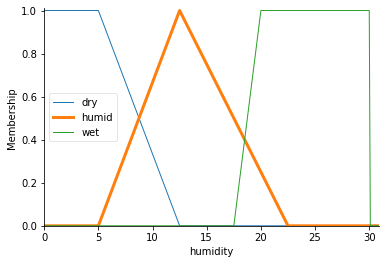

In [5]:
humidity['humid'].view()

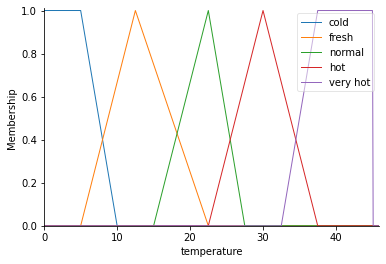

In [6]:
temperature.view()

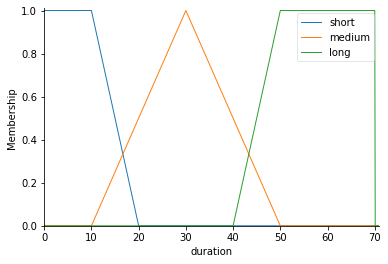

In [7]:
duration.view()

In [8]:
rule1  = ctrl.Rule(temperature['very hot'] & humidity['dry'], duration['long'])
rule2  = ctrl.Rule(temperature['hot']      & humidity['dry'], duration['long'])
rule3  = ctrl.Rule(temperature['fresh']    & humidity['dry'], duration['long'])
rule4  = ctrl.Rule(temperature['normal']   & humidity['dry'], duration['long'])
rule5  = ctrl.Rule(temperature['cold']     & humidity['dry'], duration['medium'])
rule6  = ctrl.Rule(temperature['very hot'] & humidity['humid'], duration['medium'])
rule7  = ctrl.Rule(temperature['hot']      & humidity['humid'], duration['medium'])
rule8  = ctrl.Rule(temperature['fresh']    & humidity['humid'], duration['medium'])
rule9  = ctrl.Rule(temperature['normal']   & humidity['humid'], duration['medium'])
rule10 = ctrl.Rule(temperature['cold']     & humidity['humid'], duration['short'])
rule11 = ctrl.Rule(temperature['very hot'] & humidity['wet'], duration['medium'])
rule12 = ctrl.Rule(temperature['hot']      & humidity['wet'], duration['medium'])
rule13 = ctrl.Rule(temperature['fresh']    & humidity['wet'], duration['short'])
rule14 = ctrl.Rule(temperature['normal']   & humidity['wet'], duration['short'])
rule15 = ctrl.Rule(temperature['cold']     & humidity['wet'], duration['short'])

In [9]:
duration_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

In [10]:
durating = ctrl.ControlSystemSimulation(duration_ctrl)

In [11]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
durating.input['humidity'] = 10
durating.input['temperature'] = 35

# duration.defuzzify_method = 'centroid'
# duration.defuzzify_method = 'mom'
# duration.defuzzify_method = 'som'
duration.defuzzify_method = 'lom'

# Crunch the numbers
durating.compute()

duration =  40.0


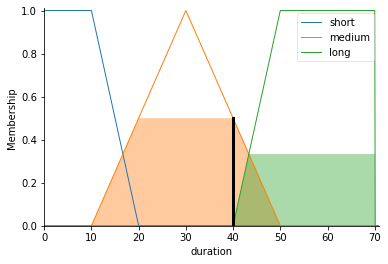

In [12]:
print('duration = ',durating.output['duration'])
duration.view(sim=durating)